<a href="https://colab.research.google.com/github/jhonnyribeiro/data-science-repository/blob/main/01_covid_19_internacoes_obitos/01_analise_covid_internacoes_obitos_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **O impacto da COVID-19 no sistema de saúde - Internações, óbitos e custo por habitante no periodo pré e durante pandemia**

  Segundo análises cientificas, estima-se que em novembro de 2019 surgia um vírus, mais especificamente na cidade de Wuhan, na China que nos meses seguintes mudaria os rumos da saúde e da ciência mundial. Em janeiro de 2020, após a divulgação do aumento do número de casos e a entrada da cidade em isolamento, o vírus começou a espalhar-se rapidamente, colocando a prova o sistema de saúde de países, sejam eles desenvolvidos ou emergentes.
  Esse estudo tem por objetivo o levantamento e análise dos dados referentes ao número de internações e óbitos registrados pelo sistema de saúde brasileiro no período pré (2019) e durante (2020-2021) da pandemia de COVID-19, com ênfase para o estado do Espirito Santo, na região sudeste do país. Em complementação, um comparativo financeiro referente ao valor do custo médio das internações entre esses períodos também será apresentado.  
  Fonte: https://datasus.saude.gov.br/informacoes-de-saude-tabnet




## **1. Internações**




Os dados a seguir representam o comparativo entre numero de internações registrados pelo governo em números totais e os classificados como COVID-19.

**1.1 Total de internações - Região Sudeste**




In [37]:
# IMPORTS 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [38]:
# TABELA INTERNAÇÕES TOTAIS - REGIÃO SUDESTE

internacao_geral = pd.read_csv("/content/INTERNACOES_ANO_MES_UNIDADE_FEDERACAO_REGIAO_SUDESTE_ATE2021-08_20211105_GERAL.CSV", engine="python", encoding="ISO-8859-1", sep=";", skiprows=4, skipfooter=12)
internacao_geral = internacao_geral.replace("-", 0)
internacao_geral = internacao_geral.replace("1", 1)
internacao_geral = internacao_geral.drop("Total", axis=1)
internacao_geral = internacao_geral.set_index("Unidade da Federação")
meses_analise = internacao_geral.columns[144:174]
internacao_geral = internacao_geral[meses_analise] 
internacao_geral["Total"] = internacao_geral.sum(axis=1)
internacao_geral = internacao_geral.sort_values("Total", ascending=False)
internacao_geral = internacao_geral.drop("Total", axis=1)
internacao_geral

,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,208950,196975,210496,217520,225473,207872,214099,216034,211709,220858,203475,194316,212127,197764,193003,144854,162855,169301,182324,184213,188640,194513,192155,184589,190961,180084,195597,162946,177389,165197
31 Minas Gerais,103677,97752,105283,110778,115484,105842,111252,108185,106752,109789,102940,101008,105174,98203,96611,76977,84366,85878,91580,92116,93796,96321,96114,94675,96405,90483,105659,96104,102548,90589
33 Rio de Janeiro,60726,56487,59816,61194,65012,60559,64086,63308,61608,63039,58196,55693,59864,54479,54250,45289,50006,50022,54719,57111,56840,56301,56446,56088,59070,53262,66715,61677,63644,55825
32 Espírito Santo,19712,19457,20873,20786,22009,20339,21868,21615,21152,21968,19963,20045,20955,20485,20262,15597,16501,16518,18438,17879,18385,19050,19924,20951,20495,19393,23303,20472,22473,19900


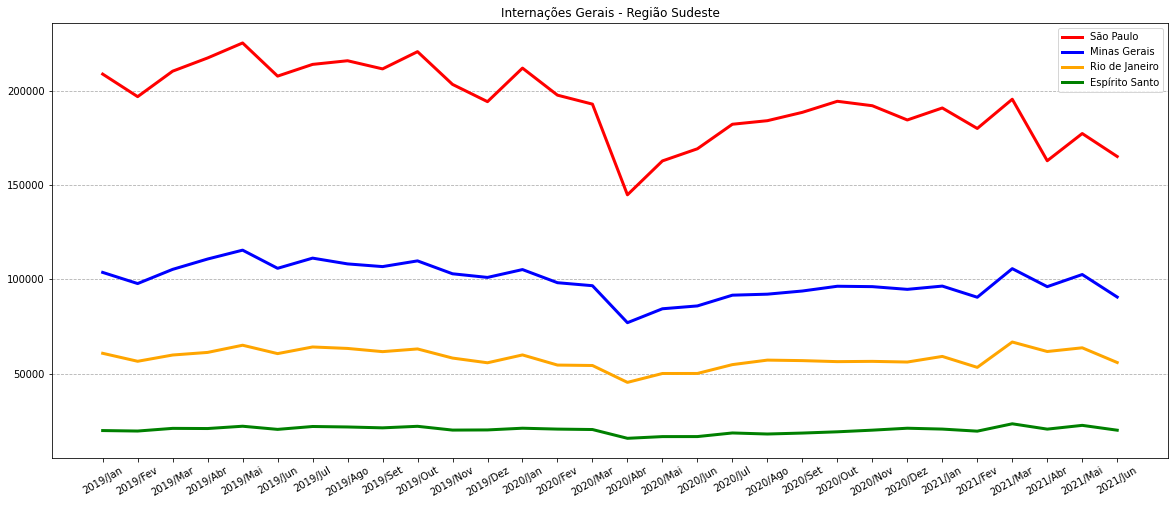

In [39]:
# GRÁFICO INTERNAÇÕES TOTAIS - REGIÃO SUDESTE

internacao_geral_SP = internacao_geral.loc['35 São Paulo']
internacao_geral_MG = internacao_geral.loc['31 Minas Gerais']
internacao_geral_RJ = internacao_geral.loc['33 Rio de Janeiro']
internacao_geral_ES = internacao_geral.loc['32 Espírito Santo']

plt.figure(figsize=(20,8))
plt.title('Internações Gerais - Região Sudeste')
plt.plot(internacao_geral_SP.index, internacao_geral_SP.values, label='São Paulo', color='red', linewidth=3.0)
plt.plot(internacao_geral_MG.index, internacao_geral_MG.values, label='Minas Gerais', color='blue', linewidth=3.0)
plt.plot(internacao_geral_RJ.index, internacao_geral_RJ.values, label='Rio de Janeiro', color='orange', linewidth=3.0)
plt.plot(internacao_geral_ES.index, internacao_geral_ES.values, label='Espírito Santo', color='green', linewidth=3.0)
plt.grid(axis="y", ls="--")
plt.tick_params(axis="x",labelrotation = 30)
plt.legend()
plt.show()


**1.2 Total de internações - Espirito Santo**

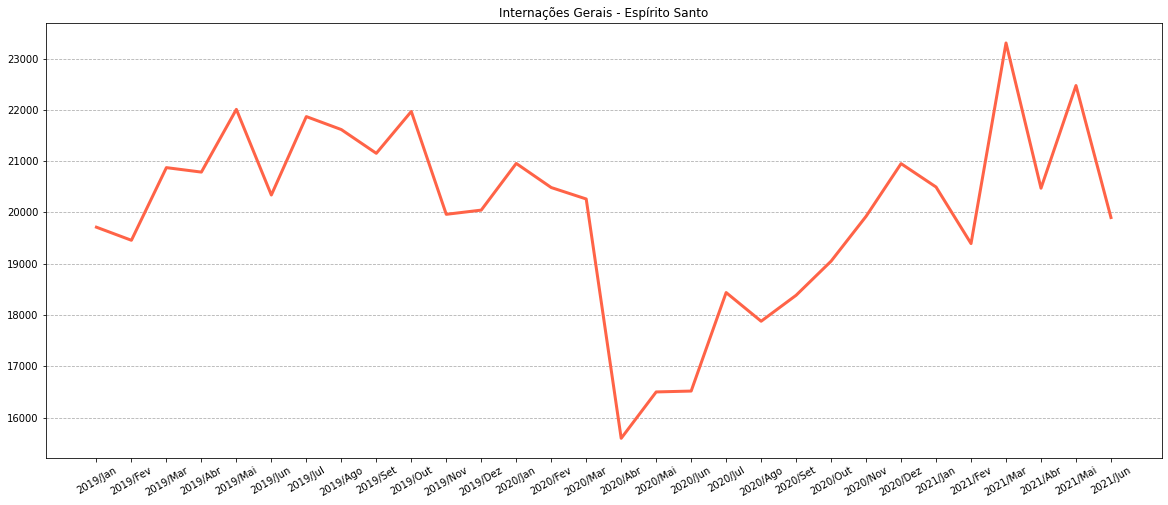

In [40]:
# GRÁFICO INTERNAÇÕES TOTAIS - ESPÍRITO SANTO

plt.figure(figsize=(20,8))
plt.title('Internações Gerais - Espírito Santo')
ax = plt.plot(internacao_geral.T['32 Espírito Santo'].index, internacao_geral.T['32 Espírito Santo'].values, color = 'tomato',linewidth=3.0)
plt.tick_params(axis="x",labelrotation = 30)
plt.grid(axis="y", ls='--')



**1.3 Total de internações(COVID-19) - Região Sudeste**



In [41]:
# TABELA INTERNAÇÕES COVID-19 - REGIÃO SUDESTE

internacao_covid = pd.read_csv("/content/INTERNACOES_ANO_MES_UNIDADE_FEDERACAO_REGIAO_SUDESTE_ATE2021-08_20211105_COVID19.CSV", engine="python", encoding="ISO-8859-1", sep=";", skiprows=5, skipfooter=12)
internacao_covid = internacao_covid.replace("-", 0)
internacao_covid = internacao_covid.replace("1", 1)
internacao_covid = internacao_covid.drop("Total", axis=1)
internacao_covid = internacao_covid.set_index("Unidade da Federação")
meses_analise = internacao_covid.columns[:-2]
internacao_covid = internacao_covid[meses_analise] 
internacao_covid["Total"] = internacao_covid.sum(axis=1)
internacao_covid = internacao_covid.sort_values("Total", ascending=False)
internacao_covid = internacao_covid.drop("Total", axis=1)
internacao_covid

,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,
35 São Paulo,1,113,7861,16899,19044,20726,16061,11219,8392,9178,14433,18729,18909,41113,33153,34197,31324
31 Minas Gerais,0,14,311,1189,4002,7120,6434,5375,3982,4133,7708,10186,9593,23306,21105,20257,16821
33 Rio de Janeiro,0,52,3425,7447,4755,4373,4114,3780,3407,5510,7994,6271,3924,10852,12683,10685,6348
32 Espírito Santo,0,7,310,1445,2335,2212,1407,988,887,1357,2278,1999,1556,3767,4339,2944,1627


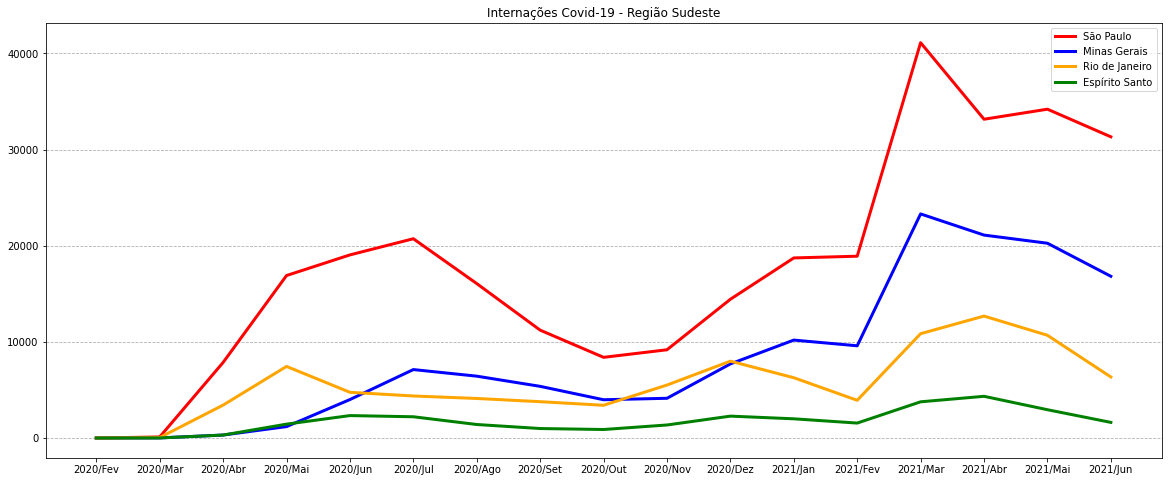

In [42]:
# GRAFICO INTERNAÇÕES COVID-19 - REGIÃO SUDESTE

internacao_covid_SP = internacao_covid.loc['35 São Paulo']
internacao_covid_MG = internacao_covid.loc['31 Minas Gerais']
internacao_covid_RJ = internacao_covid.loc['33 Rio de Janeiro']
internacao_covid_ES = internacao_covid.loc['32 Espírito Santo']

plt.figure(figsize=(20,8))
plt.title('Internações Covid-19 - Região Sudeste')
plt.plot(internacao_covid_SP.index, internacao_covid_SP.values, label='São Paulo', color='red',linewidth=3.0)
plt.plot(internacao_covid_MG.index, internacao_covid_MG.values, label='Minas Gerais', color='blue',linewidth=3.0)
plt.plot(internacao_covid_RJ.index, internacao_covid_RJ.values, label='Rio de Janeiro', color='orange',linewidth=3.0)
plt.plot(internacao_covid_ES.index, internacao_covid_ES.values, label='Espírito Santo', color='green',linewidth=3.0)
plt.grid(axis="y", ls="--")
plt.legend()
plt.show()

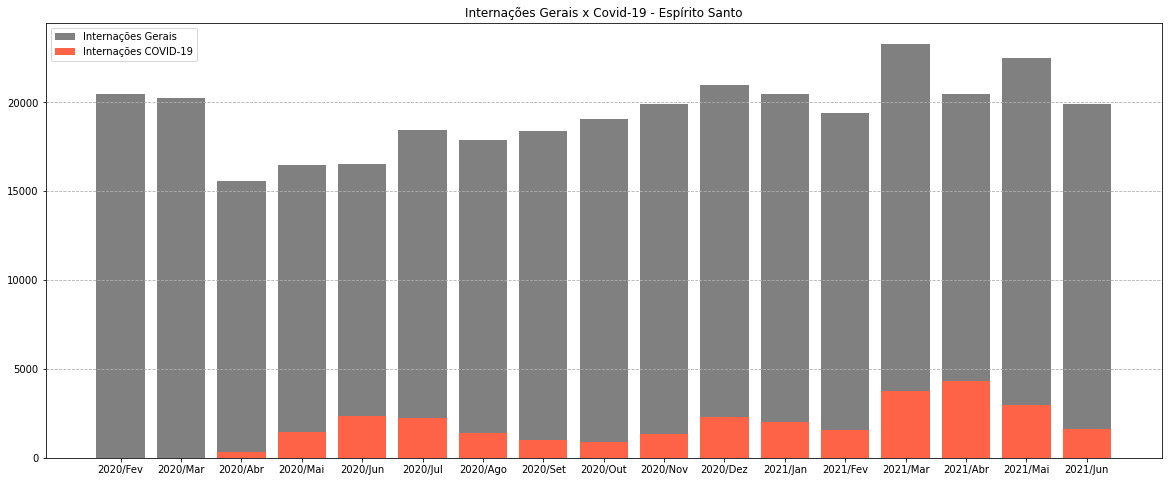

In [43]:
# GRÁFICO INTERNAÇÕES TOTAIS X COVID-19

meses_analise = internacao_geral.columns[-17:]
internacao_geral = internacao_geral[meses_analise]
internacao_geral

internacao_covid = internacao_covid.loc['32 Espírito Santo']
internacao_geral = internacao_geral.loc['32 Espírito Santo']

plt.figure(figsize=(20,8))
plt.title('Internações Gerais x Covid-19 - Espírito Santo')
plt.bar(internacao_geral.index, internacao_geral.values, label='Internações Gerais', color='grey')
plt.bar(internacao_covid.index, internacao_covid.values, label='Internações COVID-19', color='tomato')
plt.grid(axis="y", ls="--")
plt.legend()
plt.show()


**1.4 Análise dos dados**

  Em números gerais de internações, a região sudeste apresenta um comportamento similar entre os estados. Entre eles, o que possui maior variação visual analisando o gráfico é São Paulo, o que pode ser considerado normal devido ao tamanho da população e outros indicadores, como segurança e densidade da população urbana, por exemplo.
Com o foco voltado para o estado do Espírito Santo, em 2019, a oscilação entre o menor número registrado de internações (fevereiro/2019 - 19.457) e o maior (maio/2019 - 22.009), a diferença é de pouco mais de 13%. Comparando março/2021(23.303) com maio/2019 o aumento é de apenas 5,88%.
A partir do início de 2020 e seguindo por 2021, devido pandemia de COVID-19, esses números passam a apresentar um comportamento totalmente diferente. No mês de abril/2020, observamos o menor número total de internações de todo o período analisado (15.597), muito provavelmente, devido ao início da adoção de medidas sanitárias, que limitaram a circulação de pessoas e o funcionamento do comércio. por quase todo o período de 2020, os números gerais são menores em relação a 2019.
Com relação as internações por Covid-19, passamos de 7 em março de 2020 para 310 em abril de 2020, um aumento de 4.428%, atingindo 4.339 registros em abril de 2021, aumento de 1.400%. Porém, em março de 2021, onde atingimos o pico do número de internações, a COVID-19 representou apenas 16,16% dos registros totais do mês.


## **2. Óbitos**

Os dados a seguir representam o comparativo entre numero de óbitos registrados pelo governo em números totais e os classificados como COVID-19.

**1.1 Total de óbitos - Região Sudeste**

In [44]:
# TABELA ÓBITOS TOTAIS - REGIÃO SUDESTE

obitos_geral = pd.read_csv("/content/OBITOS_ANO_MES_UNIDADE_FEDERACAO_REGIAO_SUDESTE_ATE2021-08_20211106_GERAL.CSV", engine="python", encoding="ISO-8859-1", sep=";", skiprows=4, skipfooter=12)
obitos_geral = obitos_geral.replace("-", 0)
obitos_geral = obitos_geral.replace("1", 1)
obitos_geral = obitos_geral.drop("Total", axis=1)
obitos_geral = obitos_geral.set_index("Unidade da Federação")
meses_analise = obitos_geral.columns[165:182]
obitos_geral = obitos_geral[meses_analise] 
obitos_geral["Total"] = obitos_geral.sum(axis=1)
obitos_geral = obitos_geral.sort_values("Total", ascending=False)
obitos_geral = obitos_geral.drop("Total", axis=1)
obitos_geral

,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,
35 São Paulo,9687,10889,11726,13762,13748,14543,13731,12263,12121,11381,12546,14150,13296,21300,17386,17343,15566
31 Minas Gerais,4438,4746,4213,4839,5318,6139,6277,5815,5757,5167,5999,6939,6294,10684,9228,8427,6820
33 Rio de Janeiro,3663,3918,5291,6527,5075,5124,5237,4898,4702,5273,6129,5684,4608,7473,7929,6712,4993
32 Espírito Santo,688,782,828,1202,1284,1276,1140,948,1030,1117,1434,1193,1098,1794,1889,1426,1020


In [45]:
# TABELA ÓBITOS COVID - REGIÃO SUDESTE

obitos_covid = pd.read_csv("/content/OBITOS_ANO_MES_UNIDADE_FEDERACAO_REGIAO_SUDESTE_ATE2021-08_20211106_COVID19.CSV", engine="python", encoding="ISO-8859-1", sep=";", skiprows=5, skipfooter=12)
obitos_covid = obitos_covid.replace("-", 0)
obitos_covid = obitos_covid.replace("1", 1)
obitos_covid = obitos_covid.drop("Total", axis=1)
obitos_covid = obitos_covid.set_index("Unidade da Federação")
meses_analise = obitos_covid.columns[:17]
obitos_covid = obitos_covid[meses_analise] 
obitos_covid["Total"] = obitos_covid.sum(axis=1)
obitos_covid = obitos_covid.sort_values("Total", ascending=False)
obitos_covid = obitos_covid.drop("Total", axis=1)
obitos_covid

,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,
35 São Paulo,1,39,2105,3854,4267,4541,3459,2338,1610,1778,2871,4108,4285,11984,8934,8148,6893
31 Minas Gerais,0,5,63,236,858,1535,1361,1120,785,686,1478,2117,2055,6004,4898,3876,2791
33 Rio de Janeiro,0,14,1250,2519,1230,1113,1048,921,882,1395,2295,1699,1078,3576,4121,3035,1638
32 Espírito Santo,0,1,70,390,552,438,291,179,158,309,512,406,311,907,1076,523,220


**1.2 Total de óbitos - Espirito Santo**

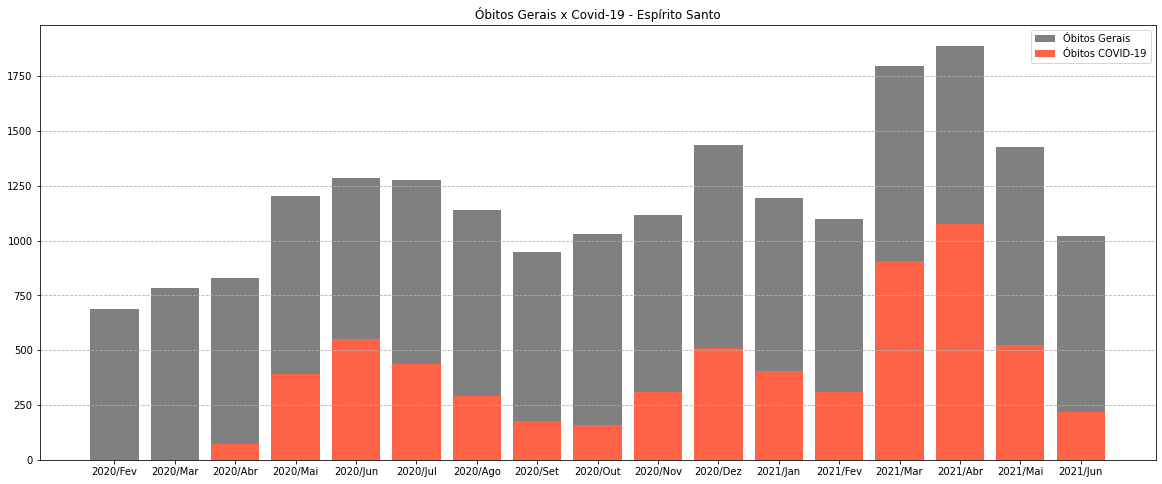

In [46]:
# GRÁFICO ÓBITOS TOTAIS X COVID-19 - ESPÍRITO SANTO

obitos_covid = obitos_covid.loc['32 Espírito Santo']
obitos_geral = obitos_geral.loc['32 Espírito Santo']

plt.figure(figsize=(20,8))
plt.title('Óbitos Gerais x Covid-19 - Espírito Santo')
plt.bar(obitos_geral.index, obitos_geral.values, label='Óbitos Gerais', color="grey")
plt.bar(obitos_covid.index, obitos_covid.values, label='Óbitos COVID-19', color="tomato")
plt.grid(axis="y", ls="--")
plt.legend()


**1.3 Análise dos dados**

O primeiro óbito no Espírito Santo foi registrado em março de 2020, atingindo o pico em abril de 2021(1076). Comparando o número de óbitos por COVID-19 em relação ao de óbitos gerais, destaque para os meses de junho/2020, março/2021 e abril/2021, ondes estes representaram 43%, 50,55% e 57% do total de óbitos registrados, respectivamente

## **3. Custo médio de internações - Espírito Santo**

In [47]:
# TABELA CUSTO MÉDIO INTERNAÇÕES - REGIÃO SUDESTE

custo_geral = pd.read_csv("/content/CUSTO_MEDIO_INTERNACAO_ANO_MES_UNIDADE_FEDERACAO_REGIAO_SUDESTE_ATE2021-08_20211110_GERAL.CSV", engine="python", encoding="ISO-8859-1", sep=";", skiprows=4, skipfooter=12, thousands =".",decimal=",")
pd.options.display.float_format = "{:.2f}".format
custo_geral = custo_geral.replace("-", 0)
custo_geral = custo_geral.drop("Total", axis=1)
custo_geral = custo_geral.set_index("Unidade da Federação")
meses_analise = custo_geral.columns[145:174]
custo_geral = custo_geral[meses_analise] 
custo_geral["Total"] = custo_geral.sum(axis=1)
custo_geral = custo_geral.sort_values("Total", ascending=False)
custo_geral = custo_geral.drop("Total", axis=1)
custo_geral

,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,1460.01,1443.76,1425.91,1417.48,1456.99,1499.54,1496.50,1475.06,1513.83,1478.42,1509.84,1505.10,1440.60,1529.84,1656.09,1692.16,1832.48,1941.59,1978.06,1939.38,1829.77,1811.93,1938.19,2023.85,2055.00,2489.71,2631.78,2630.19,2523.99
35 São Paulo,1362.65,1369.91,1347.34,1371.63,1355.49,1436.40,1408.94,1390.42,1377.30,1390.83,1408.84,1436.75,1376.95,1441.55,1762.95,1931.08,1940.55,1987.95,1906.40,1801.84,1695.62,1710.15,1832.17,1889.73,1942.47,2458.07,2755.60,2722.45,2601.73
32 Espírito Santo,1269.99,1281.12,1250.04,1303.60,1275.23,1305.58,1356.44,1301.02,1356.01,1317.14,1259.71,1317.85,1298.58,1317.24,1538.95,1775.09,1935.64,2274.34,2036.20,1893.97,1850.38,1825.23,2016.93,1984.14,2038.36,2471.63,2831.37,2524.78,2240.21
33 Rio de Janeiro,1318.21,1256.68,1258.44,1273.91,1305.01,1378.17,1324.32,1326.76,1313.04,1287.48,1352.62,1348.34,1345.81,1378.17,1535.38,1795.75,1765.50,1759.98,1578.01,1448.44,1450.14,1486.80,1724.99,1749.31,1640.68,1880.57,2147.40,2257.52,2090.04


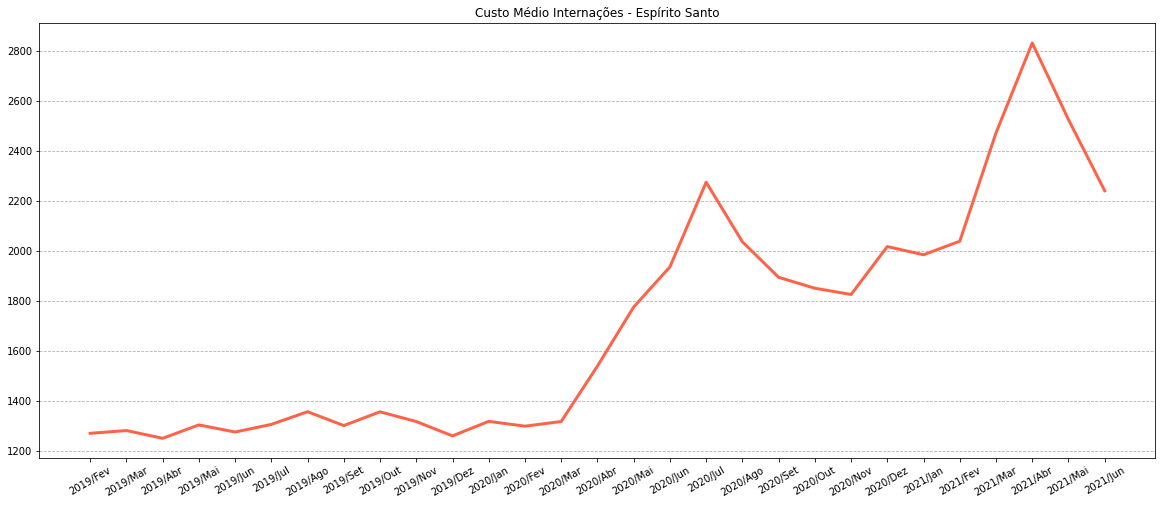

In [48]:
# GRÁFICO CUSTO MÉDIO INTERNAÇÕES - ESPÍRITO SANTO

plt.figure(figsize=(20,8))
plt.title('Custo Médio Internações - Espírito Santo')
ax = plt.plot(custo_geral.loc['32 Espírito Santo'], c="tomato", linewidth=3.0)
plt.grid(axis='y', ls='--')
plt.tick_params(axis="x",labelrotation = 30)
plt.show()

**3.1 Análise dos dados**

O custo médio dos gastos com internações disparou com a pandemia. Em julho de 2020, onde observamos um pico nos valores daquele ano, o aumento foi de 174,10% comparado a julho de 2019. Em abril de 2021 atingimos o maior valor, R$2.831,37, um aumento de 183,95% comparado a abril de 2020 e 226,48% comparado a abril de 2019.

## Conclusões 

Além do evidente impacto da pandemia nos números da saúde, tanto em valores como no comportamento das internações e dos obtidos (movimentado à sua maneira as linhas do gráfico). É possível notar com base nos números apresentados que durante o período analisado **"houve vida"**, exceto pela sazonalidade da própria pandemia, os números de "não covid" continuaram consistentes, mostrando que a ideia de que apenas se "morria de covid" ou que todas as internações eram em função do vírus, não eram exatamente como se pensava, eu pessoalmente tinha outra "impressão" baseado nos números veiculados, jogando por terra um pré-consceito por mim formado.